In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'dairy_dataset.csv')
df.head()

,Location,Total Land Area (acres),Number of Cows,Farm Size,Date,Product ID,Product Name,Brand,Quantity (liters/kg),Price per Unit,...,Production Date,Expiration Date,Quantity Sold (liters/kg),Price per Unit (sold),Approx. Total Revenue(INR),Customer Location,Sales Channel,Quantity in Stock (liters/kg),Minimum Stock Threshold (liters/kg),Reorder Quantity (liters/kg)
0,Telangana,310.84,96,Medium,2022-02-17,5,Ice Cream,Dodla Dairy,222.40,85.72,...,2021-12-27,2022-01-21,7,82.24,575.68,Madhya Pradesh,Wholesale,215,19.55,64.03
1,Uttar Pradesh,19.19,44,Large,2021-12-01,1,Milk,Amul,687.48,42.61,...,2021-10-03,2021-10-25,558,39.24,21895.92,Kerala,Wholesale,129,43.17,181.10
2,Tamil Nadu,581.69,24,Medium,2022-02-28,4,Yogurt,Dodla Dairy,503.48,36.50,...,2022-01-14,2022-02-13,256,33.81,8655.36,Madhya Pradesh,Online,247,15.10,140.83
3,Telangana,908.00,89,Small,2019-06-09,3,Cheese,Britannia Industries,823.36,26.52,...,2019-05-15,2019-07-26,601,28.92,17380.92,Rajasthan,Online,222,74.50,57.68
4,Maharashtra,861.95,21,Medium,2020-12-14,8,Buttermilk,Mother Dairy,147.77,83.85,...,2020-10-17,2020-10-28,145,83.07,12045.15,Jharkhand,Retail,2,76.02,33.40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Location                             4325 non-null   object 
 1   Total Land Area (acres)              4325 non-null   float64
 2   Number of Cows                       4325 non-null   int64  
 3   Farm Size                            4325 non-null   object 
 4   Date                                 4325 non-null   object 
 5   Product ID                           4325 non-null   int64  
 6   Product Name                         4325 non-null   object 
 7   Brand                                4325 non-null   object 
 8   Quantity (liters/kg)                 4325 non-null   float64
 9   Price per Unit                       4325 non-null   float64
 10  Total Value                          4325 non-null   float64
 11  Shelf Life (days)             

Performance of dairy farms based on location, land area, and cow population

In [15]:
Farm_Perfromance = df.groupby(['Location','Total Land Area (acres)','Number of Cows']).agg({'Quantity Sold (liters/kg)':'sum','Approx. Total Revenue(INR)':'sum','Price per Unit (sold)':'mean'}).reset_index()
print(Farm_Perfromance)

         Location  Total Land Area (acres)  Number of Cows  \
0           Bihar                    11.86              80   
1           Bihar                    20.07              62   
2           Bihar                    22.83              72   
3           Bihar                    26.02              78   
4           Bihar                    27.37              50   
...           ...                      ...             ...   
4320  West Bengal                   967.64              55   
4321  West Bengal                   979.13              52   
4322  West Bengal                   984.53              24   
4323  West Bengal                   987.82              18   
4324  West Bengal                   990.93              39   

      Quantity Sold (liters/kg)  Approx. Total Revenue(INR)  \
0                           228                    10807.20   
1                           620                    10465.60   
2                           464                    16462.72   
3  

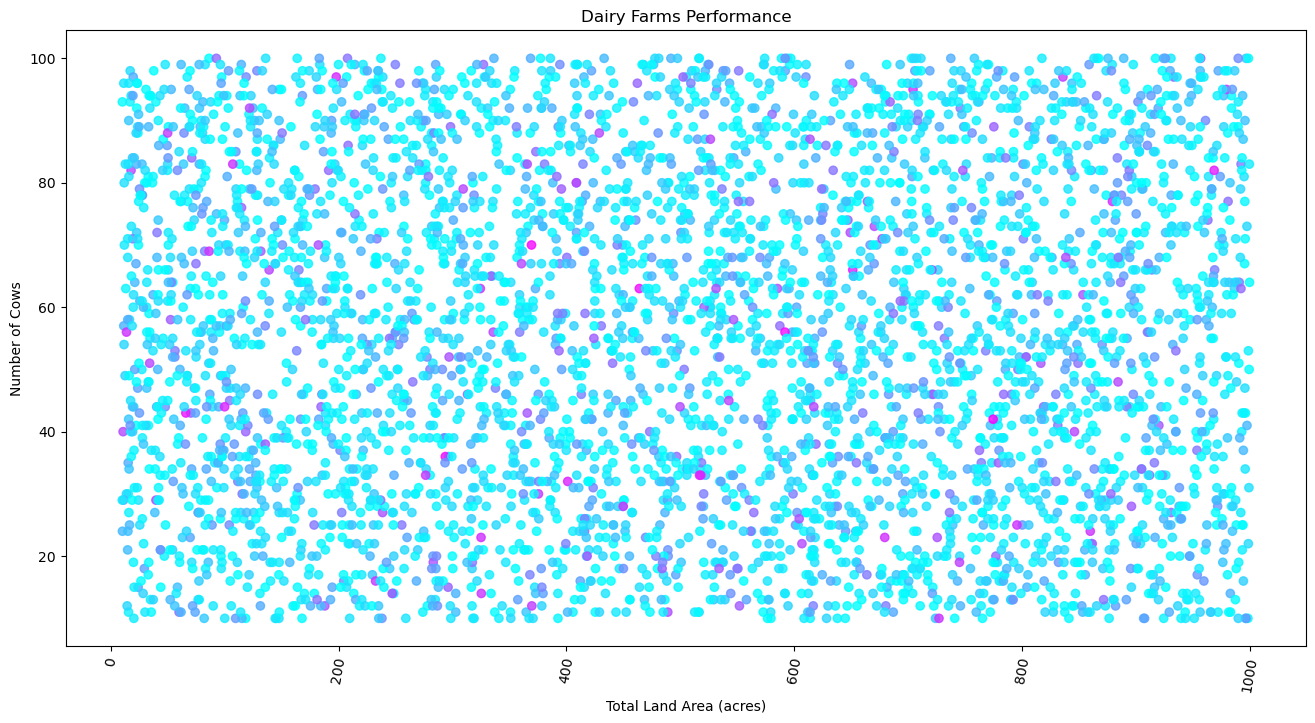

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(Farm_Perfromance['Total Land Area (acres)'],Farm_Perfromance['Number of Cows'],c=Farm_Perfromance['Approx. Total Revenue(INR)'],cmap='cool',alpha=0.8)
plt.xlabel('Total Land Area (acres)')
plt.ylabel('Number of Cows')
plt.title('Dairy Farms Performance')
plt.xticks(rotation=80)
plt.show()

Sales and distribution patterns

In [19]:
prod_sale = df.groupby(['Product Name','Brand','Location']).agg({'Quantity Sold (liters/kg)':'sum','Approx. Total Revenue(INR)':'sum'}).reset_index()
prod_sale

,Product Name,Brand,Location,Quantity Sold (liters/kg),Approx. Total Revenue(INR)
0,Butter,Amul,Bihar,1834,90479.75
1,Butter,Amul,Chandigarh,3648,233462.18
2,Butter,Amul,Delhi,1557,81356.43
3,Butter,Amul,Gujarat,1396,62300.42
4,Butter,Amul,Haryana,1836,116993.16
...,...,...,...,...,...
595,Yogurt,Palle2patnam,Rajasthan,1806,64024.60
596,Yogurt,Palle2patnam,Tamil Nadu,1639,89578.82
597,Yogurt,Palle2patnam,Telangana,324,12764.81
598,Yogurt,Palle2patnam,Uttar Pradesh,752,57580.85


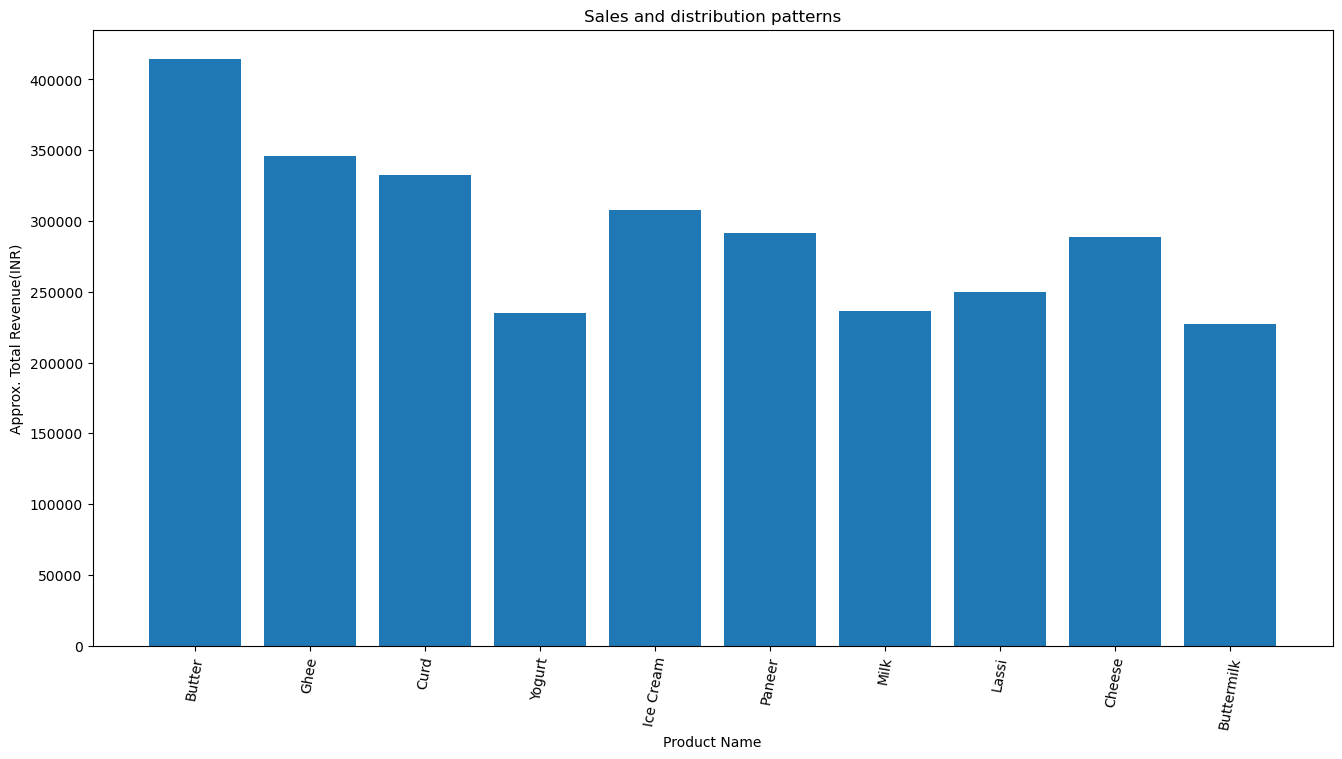

In [25]:
plt.figure(figsize=(16,8))
prod_sale_sorted = prod_sale.sort_values('Quantity Sold (liters/kg)',ascending = False)
plt.bar(prod_sale_sorted['Product Name'],prod_sale_sorted['Approx. Total Revenue(INR)'])
plt.xlabel('Product Name')
plt.ylabel('Approx. Total Revenue(INR)')
plt.title('Sales and distribution patterns')
plt.xticks(rotation=80)
plt.show()

Impact of storage conditions and shelf life on the quality and availability of dairy products

In [29]:
storage_impact = df.groupby('Storage Condition').agg({'Quantity Sold (liters/kg)':'sum'}).reset_index()
Shelf_Life_impact = df.groupby('Shelf Life (days)').agg({'Quantity Sold (liters/kg)':'sum'}).reset_index()

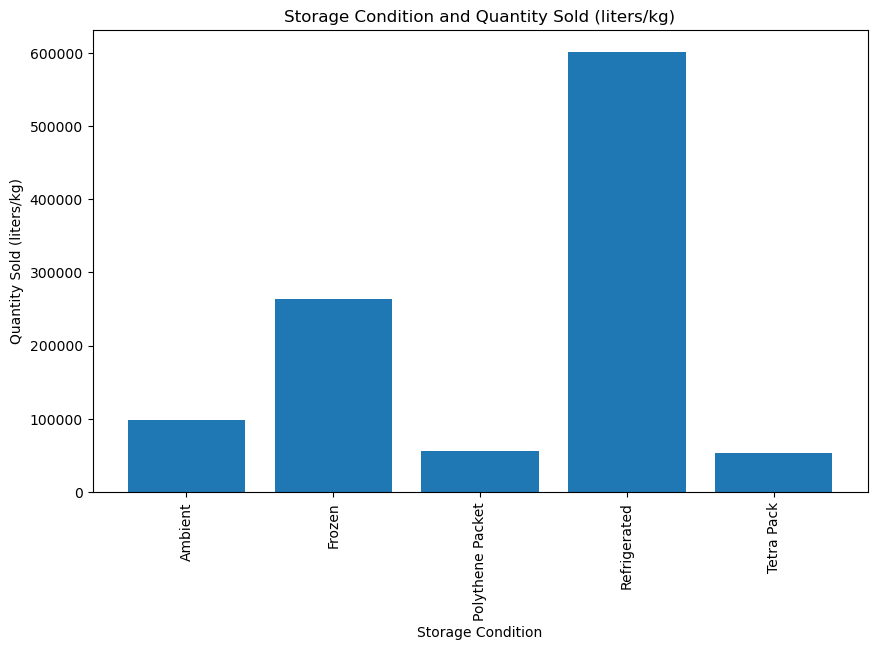

In [33]:
plt.figure(figsize=(10,6))
plt.bar(storage_impact['Storage Condition'],storage_impact['Quantity Sold (liters/kg)'])
plt.xlabel('Storage Condition')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Storage Condition and Quantity Sold (liters/kg)')
plt.xticks(rotation=90)
plt.show()

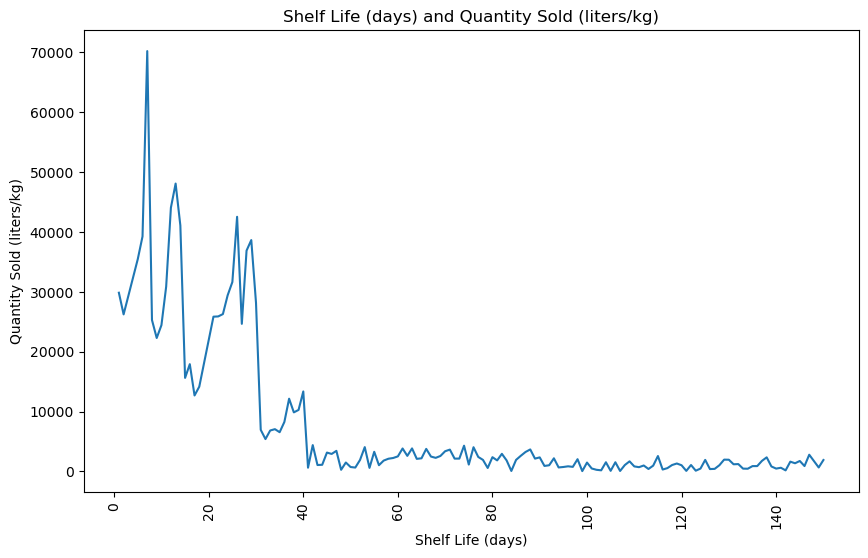

In [35]:
plt.figure(figsize=(10,6))
plt.plot(Shelf_Life_impact['Shelf Life (days)'],Shelf_Life_impact['Quantity Sold (liters/kg)'])
plt.xlabel('Shelf Life (days)')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Shelf Life (days) and Quantity Sold (liters/kg)')
plt.xticks(rotation=90)
plt.show()

Customer preferences and buying behavior based on location and sales channels

In [43]:
Customer_preferences = df.groupby(['Location','Sales Channel']).agg({'Approx. Total Revenue(INR)':'sum','Quantity Sold (liters/kg)':'sum'}).reset_index()
Customer_preferences

,Location,Sales Channel,Approx. Total Revenue(INR),Quantity Sold (liters/kg)
0,Bihar,Online,1258945.04,20975
1,Bihar,Retail,1004823.08,18090
2,Bihar,Wholesale,1182438.30,23330
3,Chandigarh,Online,2325482.54,43312
4,Chandigarh,Retail,2840348.81,47822
5,Chandigarh,Wholesale,2373151.00,43491
6,Delhi,Online,1884338.34,37193
7,Delhi,Retail,2781486.77,50452
8,Delhi,Wholesale,2286300.13,42451
9,Gujarat,Online,1004067.06,19516


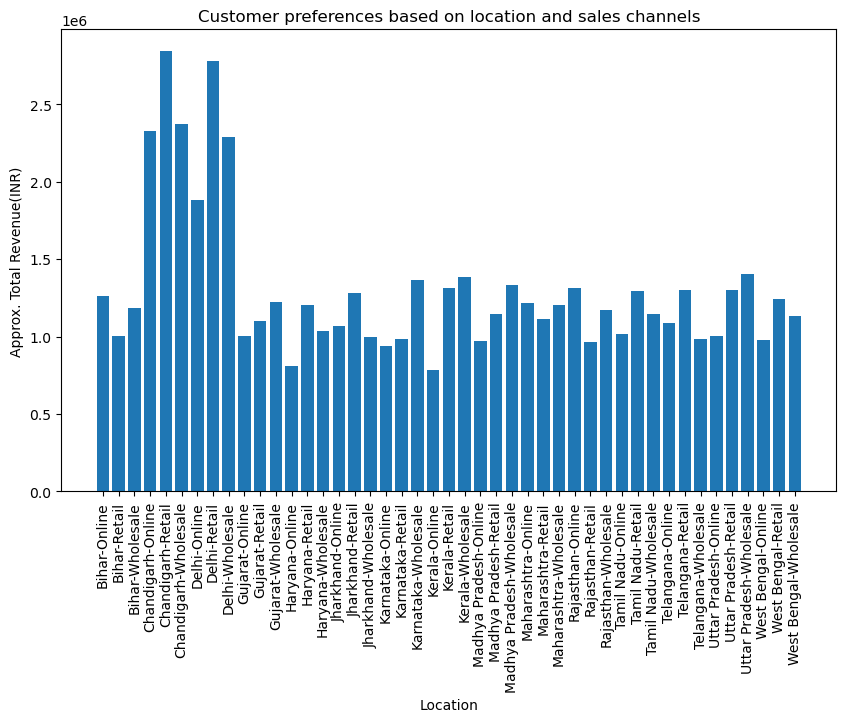

In [53]:
plt.figure(figsize=(10,6))
x = Customer_preferences['Location']+'-'+Customer_preferences['Sales Channel']
plt.bar(x,Customer_preferences['Approx. Total Revenue(INR)'])
plt.xlabel('Location')
plt.ylabel('Approx. Total Revenue(INR)')
plt.title('Customer preferences based on location and sales channels')
plt.xticks(rotation=90)
plt.show()

In [55]:
Buying_behavior = df.groupby(['Location','Sales Channel']).agg({'Quantity Sold (liters/kg)':'mean','Price per Unit (sold)':'mean'}).reset_index()
Buying_behavior

,Location,Sales Channel,Quantity Sold (liters/kg),Price per Unit (sold)
0,Bihar,Online,238.352273,59.365000
1,Bihar,Retail,251.250000,53.912778
2,Bihar,Wholesale,274.470588,52.528235
3,Chandigarh,Online,262.496970,54.199636
4,Chandigarh,Retail,264.209945,57.646464
5,Chandigarh,Wholesale,251.393064,54.973757
6,Delhi,Online,238.416667,53.344423
7,Delhi,Retail,261.409326,55.610777
8,Delhi,Wholesale,241.198864,53.989602
9,Gujarat,Online,226.930233,51.263953


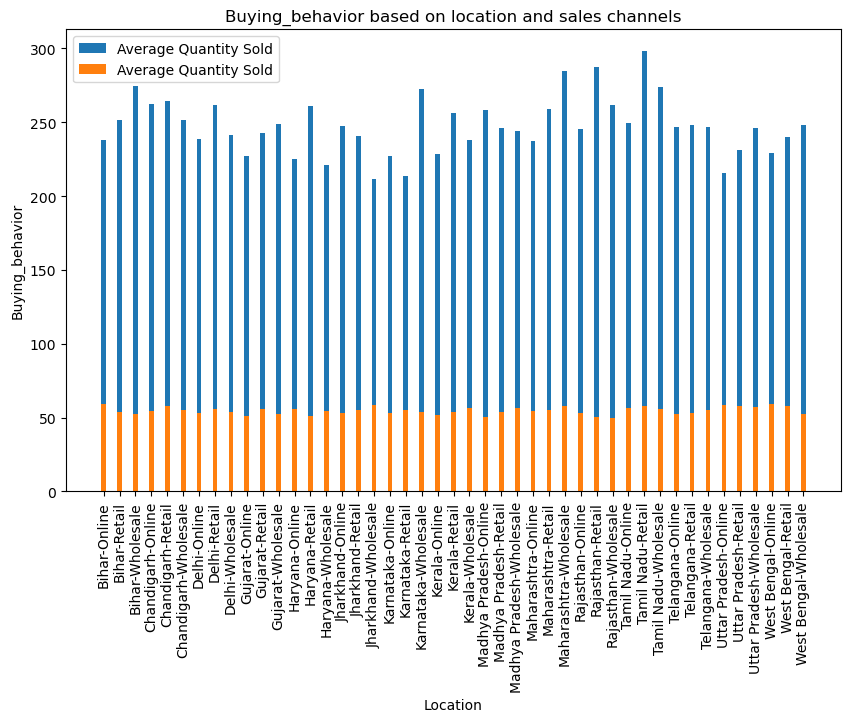

In [61]:
plt.figure(figsize=(10,6))
x = Buying_behavior['Location']+'-'+Buying_behavior['Sales Channel']
width = 0.3
plt.bar(x,Buying_behavior['Quantity Sold (liters/kg)'],width,label='Average Quantity Sold')
plt.bar(x,Buying_behavior['Price per Unit (sold)'],width,label='Average Quantity Sold')
plt.xlabel('Location')
plt.ylabel('Buying_behavior')
plt.title('Buying_behavior based on location and sales channels')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [63]:
inventory_metrics = df.groupby('Product Name').agg({
    'Quantity in Stock (liters/kg)': 'sum',
    'Minimum Stock Threshold (liters/kg)': 'mean',
    'Reorder Quantity (liters/kg)': 'mean'
}).reset_index()

In [67]:
reorder_products = inventory_metrics[inventory_metrics['Quantity in Stock (liters/kg)'] < inventory_metrics['Minimum Stock Threshold (liters/kg)']]

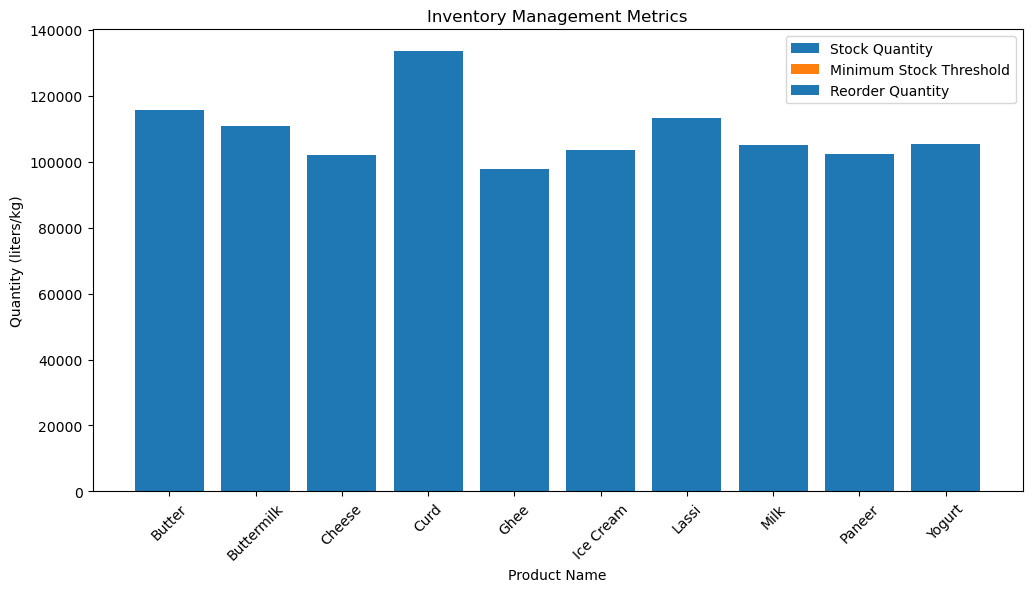

In [69]:
plt.figure(figsize=(12, 6))
x = inventory_metrics['Product Name']
plt.bar(x, inventory_metrics['Quantity in Stock (liters/kg)'], label='Stock Quantity')
plt.bar(x, inventory_metrics['Minimum Stock Threshold (liters/kg)'], label='Minimum Stock Threshold')
plt.bar(reorder_products['Product Name'], reorder_products['Reorder Quantity (liters/kg)'], label='Reorder Quantity', color='red')
plt.xlabel('Product Name')
plt.ylabel('Quantity (liters/kg)')
plt.title('Inventory Management Metrics')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Trend analysis in the dairy industry

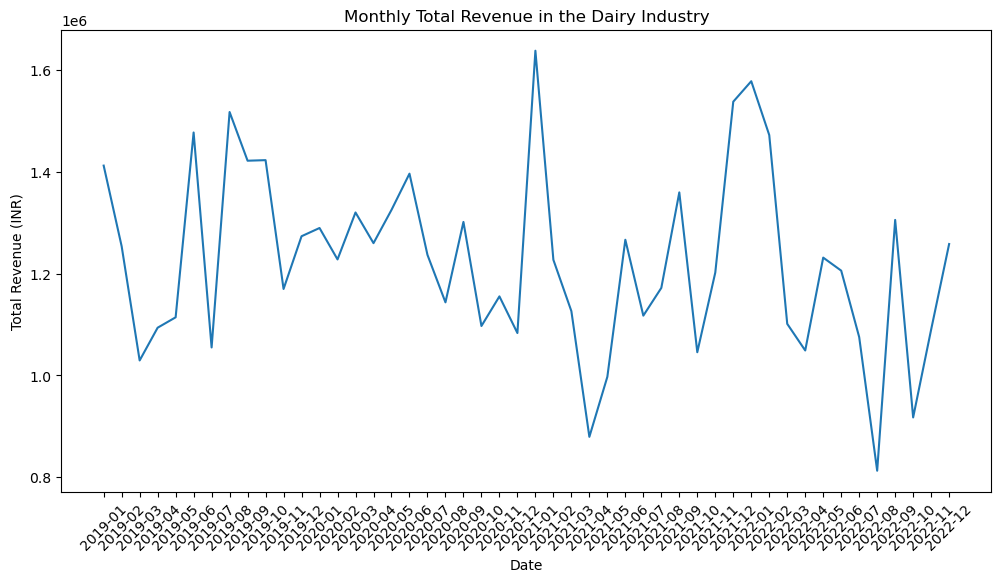

In [75]:
monthly_revenue = df.groupby(pd.to_datetime(df['Date']).dt.to_period('M')).agg({
    'Approx. Total Revenue(INR)': 'sum'
}).reset_index()
monthly_revenue['Date'] = monthly_revenue['Date'].astype(str)  # Convert 'Date' column back to string format
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Date'], monthly_revenue['Approx. Total Revenue(INR)'])
plt.xlabel('Date')
plt.ylabel('Total Revenue (INR)')
plt.title('Monthly Total Revenue in the Dairy Industry')
plt.xticks(rotation=45)
plt.show()

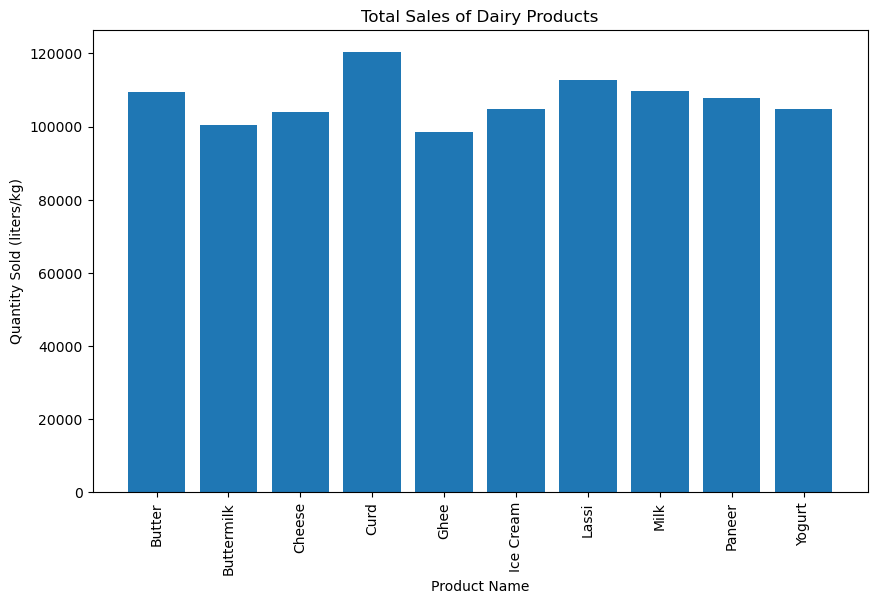

In [77]:
prod_sales = df.groupby('Product Name').agg({'Quantity Sold (liters/kg)':'sum'}).reset_index()
plt.figure(figsize=(10,6))
plt.bar(prod_sales['Product Name'],prod_sales['Quantity Sold (liters/kg)'])
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold (liters/kg)')
plt.title('Total Sales of Dairy Products')
plt.xticks(rotation=90)
plt.show()

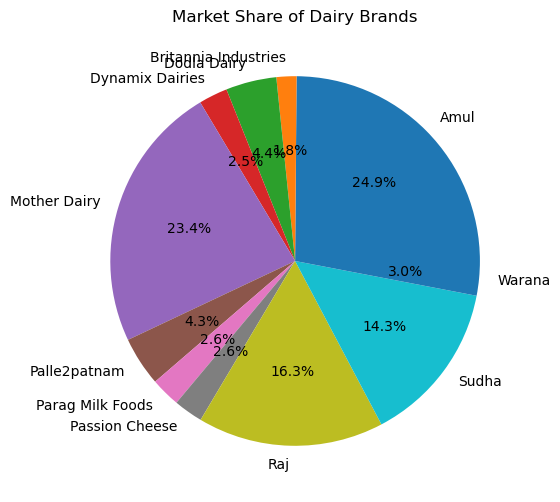

In [85]:
brand_market_share = df.groupby('Brand').agg({'Approx. Total Revenue(INR)':'sum'}).reset_index()
plt.figure(figsize=(10,6))
plt.pie(brand_market_share['Approx. Total Revenue(INR)'],labels=brand_market_share['Brand'],autopct='%1.1f%%')
plt.title('Market Share of Dairy Brands')
plt.show()